Based off this EDA, we're able to see that motor vehicle accidents is the most occured crime within Boston. Seems like majority of crimes happen in the evening. A lot of the crime seems to be on Friday and there's not too much on Sunday.

In [60]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os 

In [61]:
!pip install folium
import folium
from folium.plugins import HeatMap

In [62]:
# Create dataframe 
df = pd.read_csv("crime_data.csv", encoding = 'latin')
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,TESTTEST2,423,NaN,ASSAULT - AGGRAVATED,External,,0,2019-10-16 00:00:00,2019,10,Wednesday,0,NaN,RIVERVIEW DR,NaN,NaN,"(0.00000000, 0.00000000)"
1,I90583827,1402,NaN,VANDALISM,E18,498,0,2019-11-02 05:09:00,2019,11,Saturday,5,NaN,BRADLEE ST,NaN,NaN,"(0.00000000, 0.00000000)"
2,I192082859,724,Auto Theft,AUTO THEFT,E18,519,NaN,2019-10-13 09:28:24,2019,10,Sunday,9,Part One,LINCOLN ST,42.259518,-71.121563,"(42.25951765, -71.12156299)"
3,I192082751,724,Auto Theft,AUTO THEFT,E18,493,NaN,2019-10-12 20:11:26,2019,10,Saturday,20,Part One,METROPOLITAN AVE,42.262092,-71.116710,"(42.26209214, -71.11670964)"
4,I192082680,727,Auto Theft,AUTO THEFT - LEASED/RENTED VEHICLE,D14,794,NaN,2019-10-12 15:12:43,2019,10,Saturday,15,Part One,ALLSTON ST,42.352375,-71.135096,"(42.35237455, -71.13509584)"


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436140 entries, 0 to 436139
Data columns (total 17 columns):
INCIDENT_NUMBER        436140 non-null object
OFFENSE_CODE           436140 non-null int64
OFFENSE_CODE_GROUP     426840 non-null object
OFFENSE_DESCRIPTION    436140 non-null object
DISTRICT               433918 non-null object
REPORTING_AREA         436140 non-null object
SHOOTING               11047 non-null object
OCCURRED_ON_DATE       436140 non-null object
YEAR                   436140 non-null int64
MONTH                  436140 non-null int64
DAY_OF_WEEK            436140 non-null object
HOUR                   436140 non-null int64
UCR_PART               426730 non-null object
STREET                 422763 non-null object
Lat                    399636 non-null float64
Long                   399636 non-null float64
Location               436140 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 56.6+ MB


In [64]:
df.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,436140.000000,436140.000000,436140.000000,436140.00000,399636.000000,399636.000000
mean,2328.805432,2017.133072,6.718221,13.11420,42.221634,-70.920432
std,1181.867666,1.299520,3.280900,6.30366,2.084320,3.371579
min,111.000000,2015.000000,1.000000,0.00000,-1.000000,-71.178674
25%,1102.000000,2016.000000,4.000000,9.00000,42.297105,-71.097223
50%,3001.000000,2017.000000,7.000000,14.00000,42.325538,-71.077619
75%,3201.000000,2018.000000,9.000000,18.00000,42.348546,-71.062583
max,3831.000000,2019.000000,12.000000,23.00000,42.395042,-1.000000


In [65]:
# fill fillna
df["SHOOTING"].fillna("N", inplace = True)
df["DAY_OF_WEEK"] = pd.Categorical(df["DAY_OF_WEEK"], 
                                  categories= ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
                                  ordered = True)
#df["Lat"].replace(-1, None, inplace= True)
#df["Long"].replace(-1, None, inplace= True) 

df.describe() 

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,436140.000000,436140.000000,436140.000000,436140.00000,399636.000000,399636.000000
mean,2328.805432,2017.133072,6.718221,13.11420,42.221634,-70.920432
std,1181.867666,1.299520,3.280900,6.30366,2.084320,3.371579
min,111.000000,2015.000000,1.000000,0.00000,-1.000000,-71.178674
25%,1102.000000,2016.000000,4.000000,9.00000,42.297105,-71.097223
50%,3001.000000,2017.000000,7.000000,14.00000,42.325538,-71.077619
75%,3201.000000,2018.000000,9.000000,18.00000,42.348546,-71.062583
max,3831.000000,2019.000000,12.000000,23.00000,42.395042,-1.000000


In [66]:
# number of incidents
print(str(df.shape[0]))

436140


In [67]:
df = df.loc[df['YEAR'].isin([2018,2019])]
df['OCCURRED_ON_DATE'] = pd.to_datetime(df['OCCURRED_ON_DATE'])
df.DAY_OF_WEEK = pd.Categorical(df.DAY_OF_WEEK, categories = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ordered=True )
rename = {'OFFENSE_CODE_GROUP':'Group',
         'OFFENSE_DESCRIPTION':'Description',
         'DISTRICT':'District',
         'REPORTING_AREA':'Area',
         'SHOOTING':'Shooting',
         'OCCURRED_ON_DATE':'Date',
         'YEAR':'Year',
         'MONTH':'Month',
         'DAY_OF_WEEK':'Day',
         'HOUR':'Hour',
         'STREET':'Street'}
df.rename(index=str, columns=rename, inplace=True)
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,Group,Description,District,Area,Shooting,Date,Year,Month,Day,Hour,UCR_PART,Street,Lat,Long,Location
0,TESTTEST2,423,NaN,ASSAULT - AGGRAVATED,External,,0,2019-10-16 00:00:00,2019,10,Wednesday,0,NaN,RIVERVIEW DR,NaN,NaN,"(0.00000000, 0.00000000)"
1,I90583827,1402,NaN,VANDALISM,E18,498,0,2019-11-02 05:09:00,2019,11,Saturday,5,NaN,BRADLEE ST,NaN,NaN,"(0.00000000, 0.00000000)"
2,I192082859,724,Auto Theft,AUTO THEFT,E18,519,N,2019-10-13 09:28:24,2019,10,Sunday,9,Part One,LINCOLN ST,42.259518,-71.121563,"(42.25951765, -71.12156299)"
3,I192082751,724,Auto Theft,AUTO THEFT,E18,493,N,2019-10-12 20:11:26,2019,10,Saturday,20,Part One,METROPOLITAN AVE,42.262092,-71.116710,"(42.26209214, -71.11670964)"
4,I192082680,727,Auto Theft,AUTO THEFT - LEASED/RENTED VEHICLE,D14,794,N,2019-10-12 15:12:43,2019,10,Saturday,15,Part One,ALLSTON ST,42.352375,-71.135096,"(42.35237455, -71.13509584)"


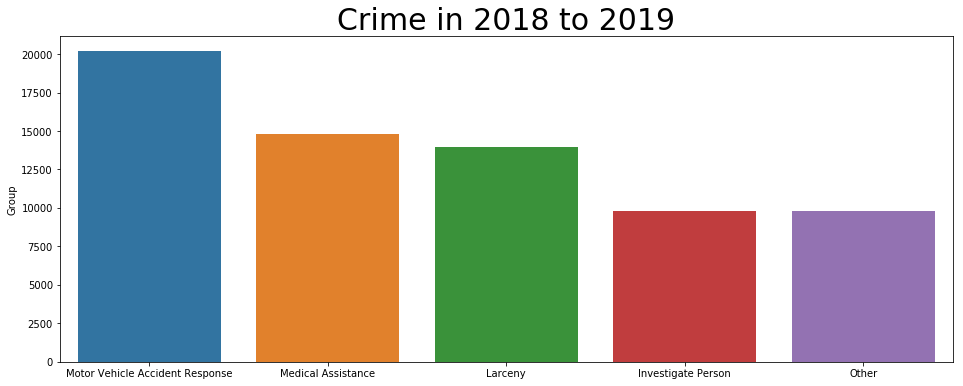

In [68]:
# Based off the data, it seems like Motor vehible accident response is the highest
crime = df.Group.value_counts()
crime.head()
crime = crime.to_frame()
crime.columns
plt.figure(figsize=(16,6))
sns.barplot(x=crime.index[:5],y='Group', data=crime.head())
plt.title('Crime in 2018 to 2019',fontsize=30)
plt.show()

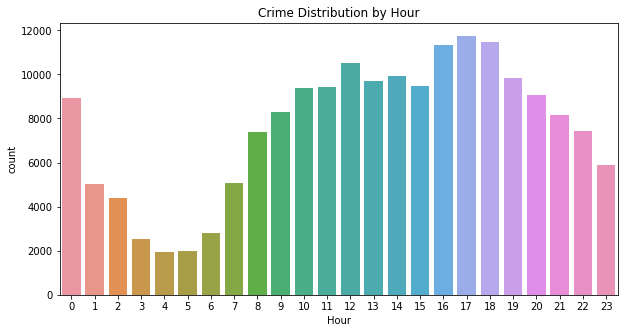

In [78]:
# Crime distribution
crimewk = df[['Group','Year','Month','Day','Hour','Date']]
plt.figure(figsize=(10,5))
sns.countplot(x='Hour', data = crimewk)
plt.title('Crime Distribution by Hour')
plt.show()

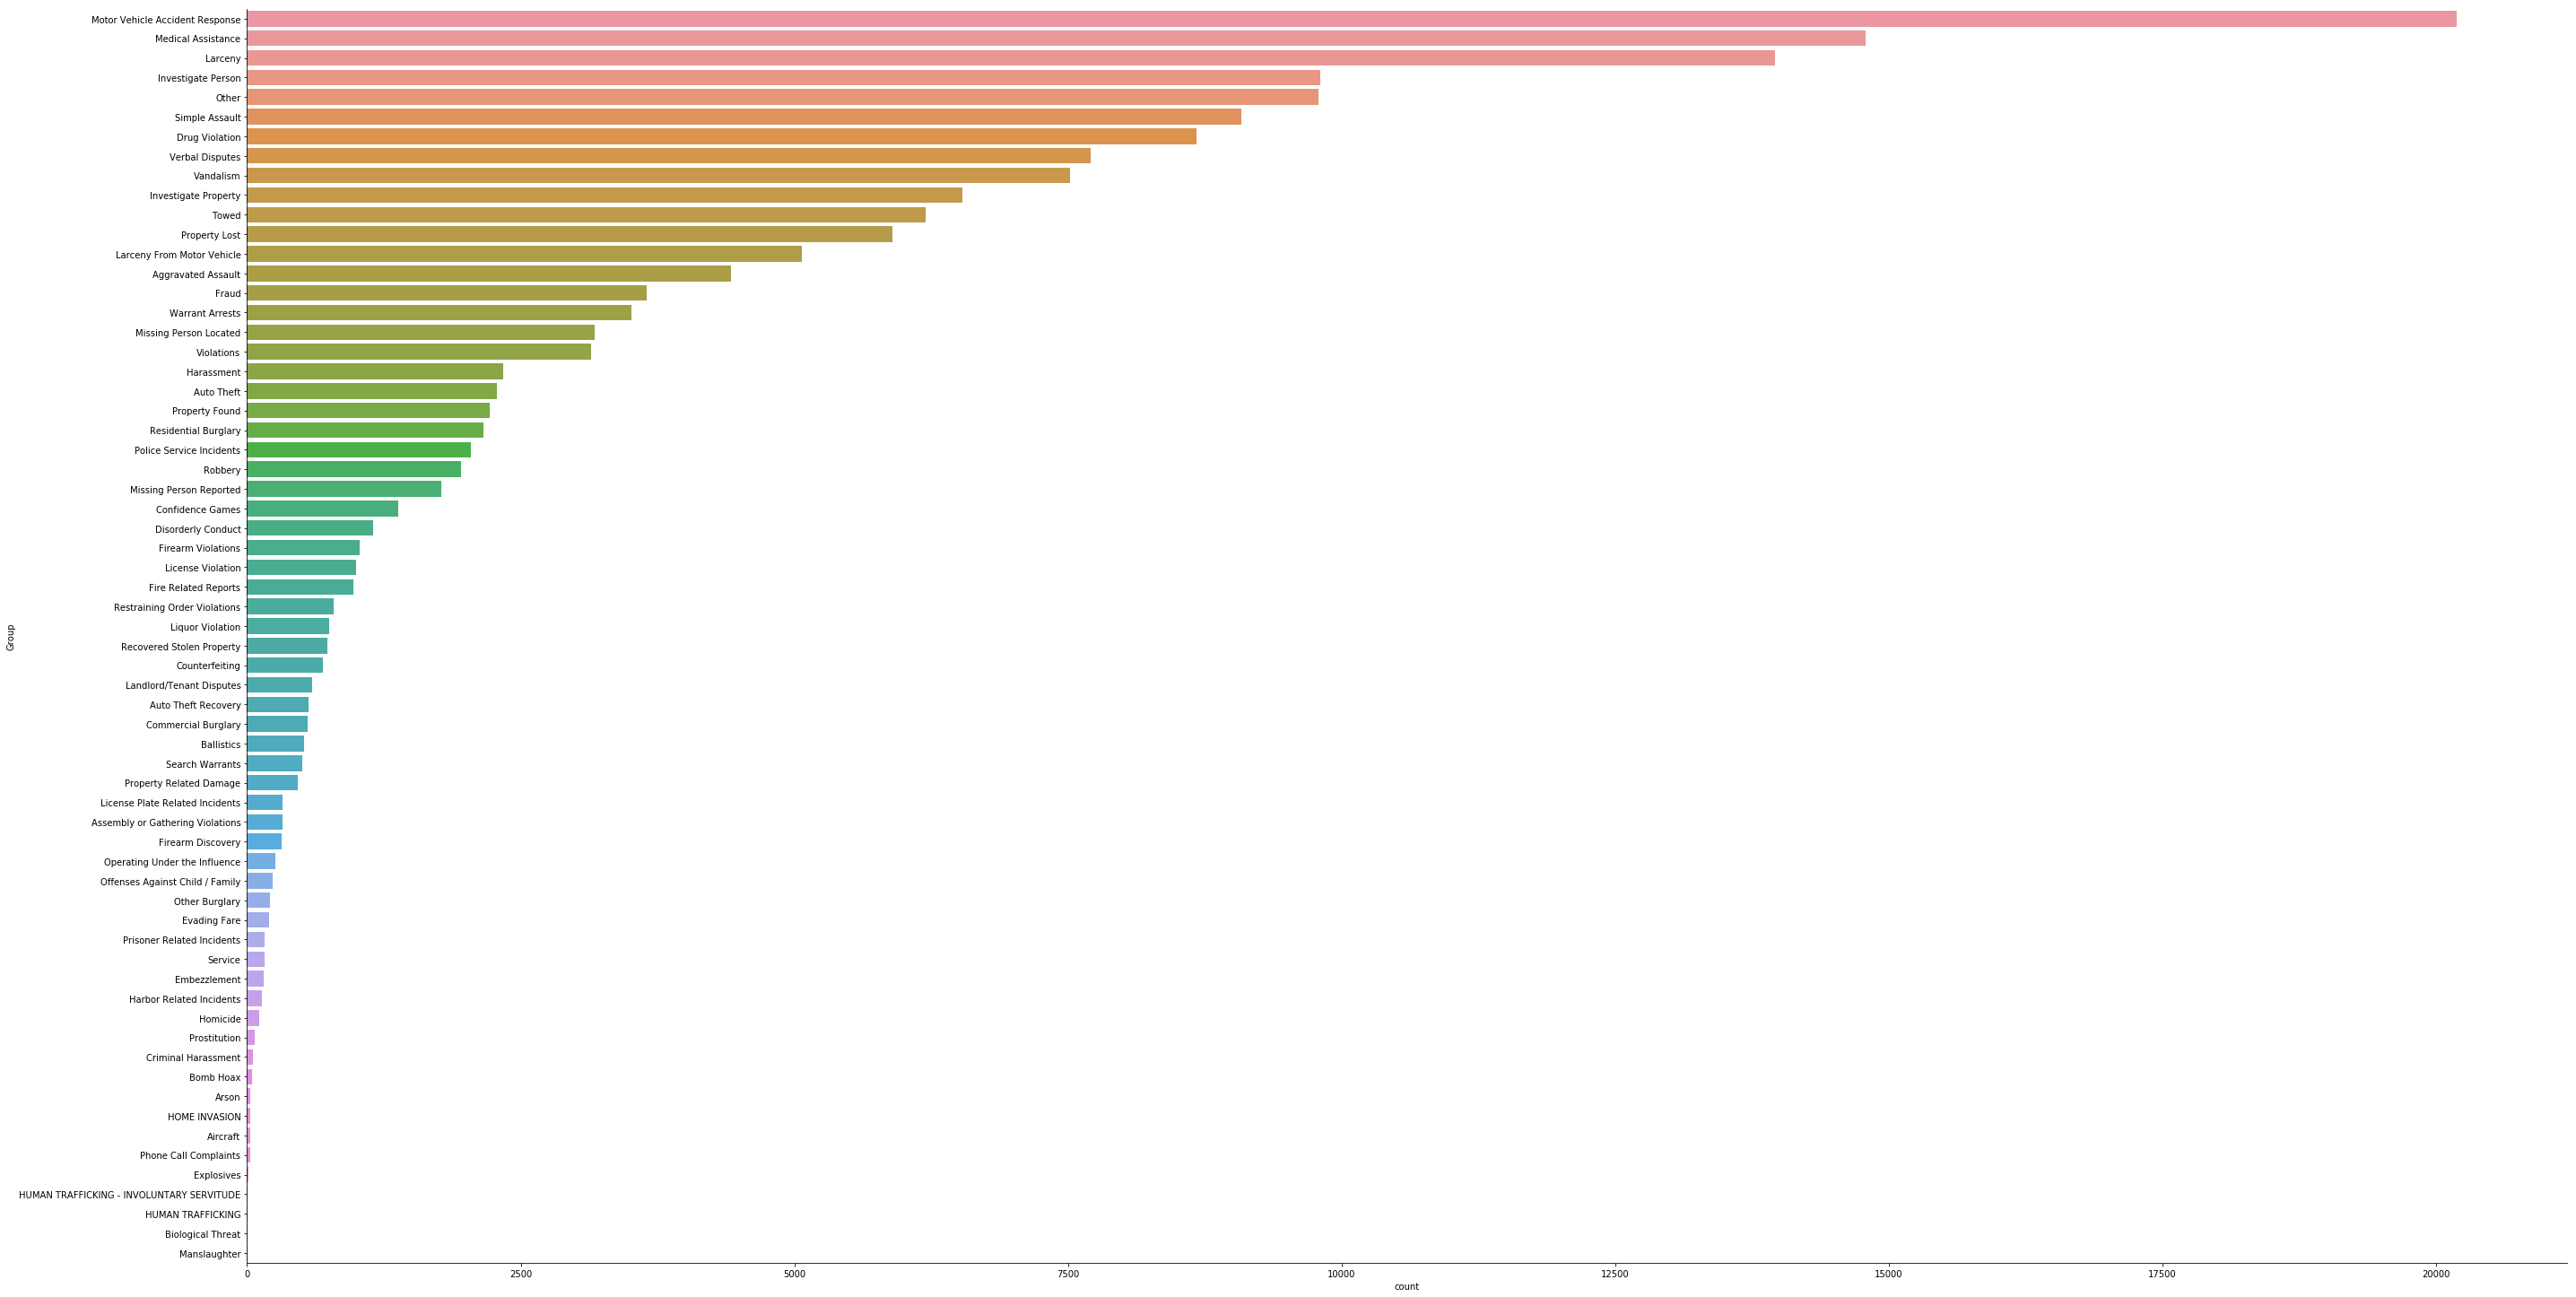

In [80]:
sns.catplot(y='Group',data=df,height=20,aspect=2, kind='count', 
            order=df.Group.value_counts().index)
#plt.show()

In [87]:
# replaces -1 values with None
df.Lat.replace(-1,None,inplace=True)
df.Long.replace(-1,None,inplace=True)

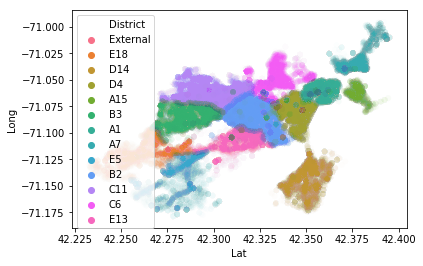

In [89]:
# where do most crimes occur 
sns.scatterplot(x='Lat',y='Long', data=df, alpha=0.01, hue='District')
plt.show()